## Práctica 3

In [1]:
%pip install ucimlrepo
import numpy as np
from sklearn.svm import SVC
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo

Note: you may need to restart the kernel to use updated packages.


## Primera parte (estudio guiado)

### 1.1. Problema separable linealmente


In [2]:
data_1=pandas.read_csv('dataset_1.csv')


In [3]:
print(data_1.shape)
data_1.head()

(100, 3)


,x1,x2,y
0,-0.581066,0.841837,0
1,-0.894309,-0.207835,0
2,-1.207552,0.212034,0
3,-1.364174,0.002099,0
4,-0.737687,1.051772,0


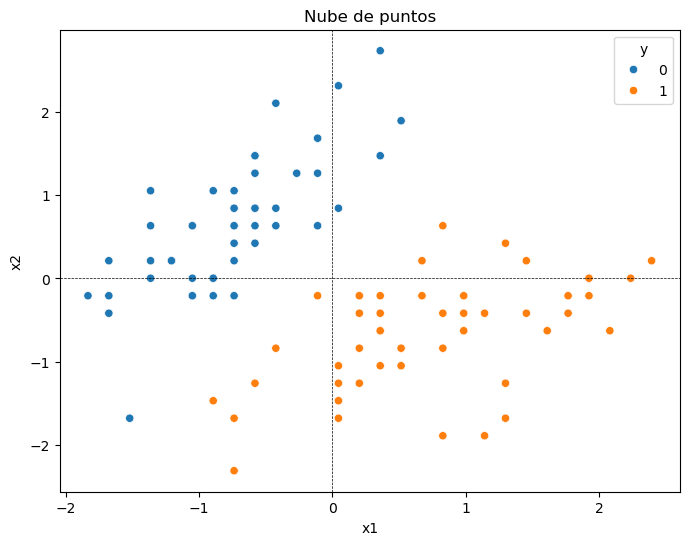

In [4]:
def plot_manual(data,m=None,C=None):
    plt.figure(figsize=(8, 6))
    plt.title('Nube de puntos')
    sns.scatterplot(data = data,x='x1', y='x2', hue='y')
    plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
    plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
    if m !=None and C != None:
        x_vals = np.linspace(min(data['x1']), max(data['x1']), 100)
        y_vals = m * x_vals + C
        plt.plot(x_vals, y_vals, "k--", label="Hiperplano manual")
    
    plt.show()
plot_manual(data_1)

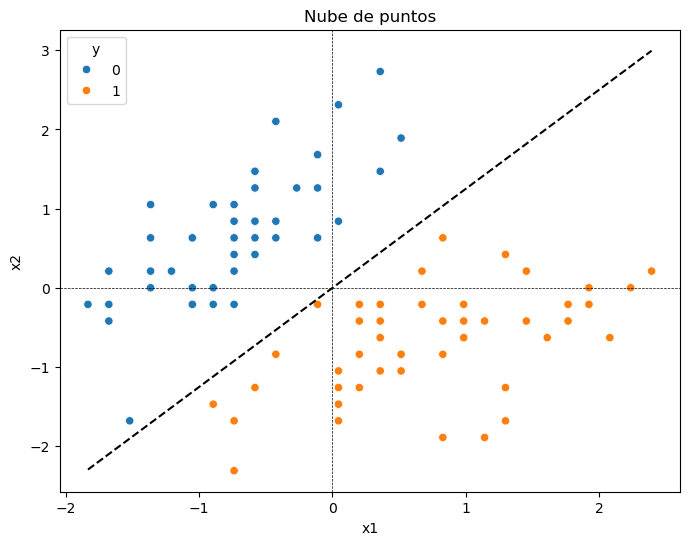

In [5]:
plot_manual(data_1,1.25,0) #valores m y c para el hiperplano manual

In [6]:
X = data_1[["x1", "x2"]]
y = data_1["y"]

svm = SVC(kernel="linear", C=100.0)
svm.fit(X, y)

y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento: {accuracy * 100:.2f}%")


Precisión en el conjunto de entrenamiento: 100.00%


100.0
Score: None


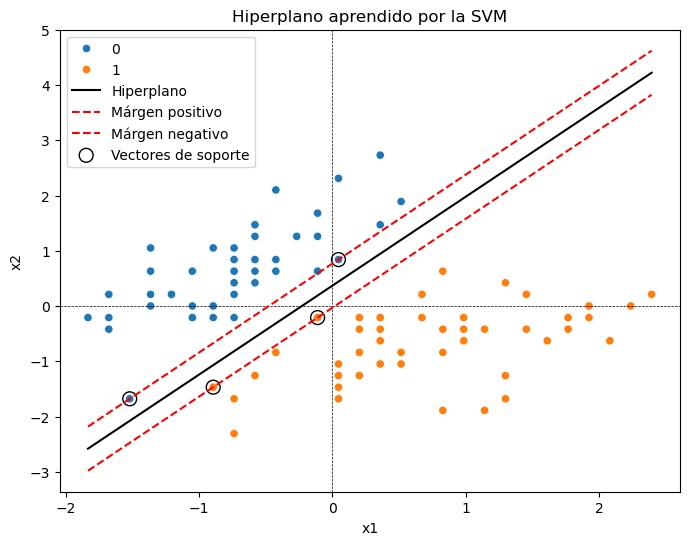

In [7]:

def plot_svm(data,svm):
    print(f"Score: {print(svm.score(X,y)*100)}")
    w = svm.coef_[0]
    b = svm.intercept_[0]
    
    x_vals = np.linspace(min(data['x1']), max(data['x1']), 100)
    y_hiperplano = -(w[0] / w[1]) * x_vals - b / w[1]
    
    
    plt.figure(figsize=(8, 6))
    
    sns.scatterplot(data = data,x='x1', y='x2', hue='y')
    plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
    plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
    
    plt.plot(x_vals, y_hiperplano, "k-", label="Hiperplano")
    plt.plot(x_vals, y_hiperplano + 1 / w[1], "r--", label="Márgen positivo")
    plt.plot(x_vals, y_hiperplano - 1 / w[1], "r--", label="Márgen negativo")
    
    plt.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=100,
        facecolors="none",
        edgecolors="k",
        label="Vectores de soporte"
    )
    plt.title("Hiperplano aprendido por la SVM")
    plt.legend()
    plt.show()
plot_svm(data_1,svm)

99.0
Score: None


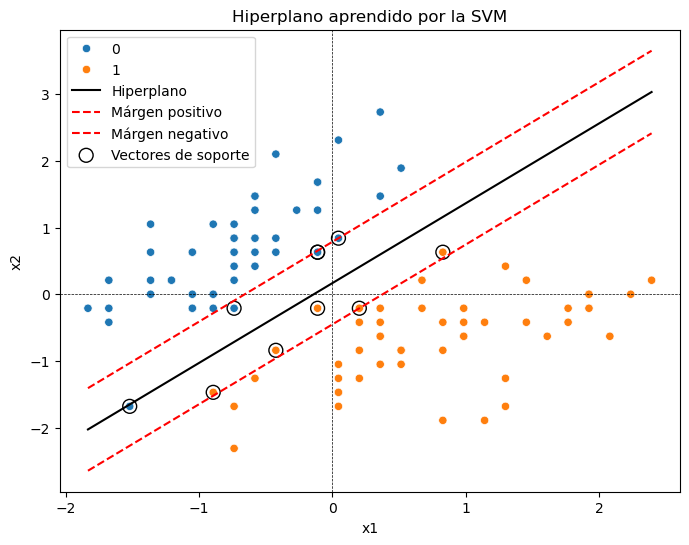

In [8]:
svm = SVC(kernel="linear", C=1.0)
svm.fit(X, y)
plot_svm(data_1,svm)


### 1.2. Problema cuasi-separable linealmente


In [9]:
data_2=pandas.read_csv('dataset_2.csv')

In [10]:
print(data_2.shape)
data_2.head()

(100, 3)


,x1,x2,y
0,-0.416064,0.943759,0
1,-1.311150,-0.009548,0
2,-0.706105,0.388291,0
3,-1.473602,0.101953,0
4,-0.989893,1.221272,0


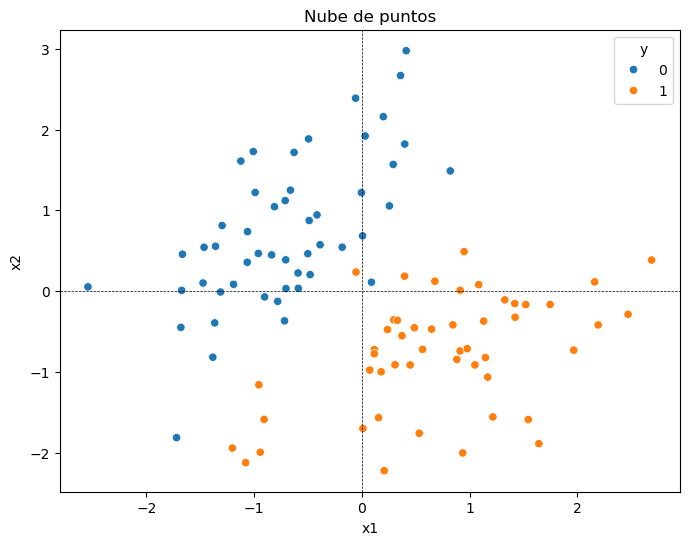

In [11]:
plot_manual(data_2)# Configurar el modelo SVM con kernel lineal

In [12]:
# Configurar el modelo SVM con kernel lineal
svc = SVC(kernel='linear')
X = data_2[["x1", "x2"]]
y = data_2["y"]

p={'C':[i*0.1 for i in range(1,1000)]}

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=p,
    scoring=make_scorer(accuracy_score),  # Métrica: precisión
    cv=5,  
    verbose=1  # Muestra el progreso
)
grid_search.fit(X, y)

best_C = grid_search.best_params_['C']

print(f"Mejor valor de C: {best_C}")
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 0.6000000000000001
Mejor puntuación de validación cruzada: 99.00%


In [13]:
best_svc = SVC(kernel='linear', C=best_C)
best_svc.fit(X, y)

# Evaluar en el conjunto de entrenamiento
y_pred = best_svc.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento con C óptimo: {accuracy * 100:.2f}%")


Precisión en el conjunto de entrenamiento con C óptimo: 99.00%


99.0
Score: None


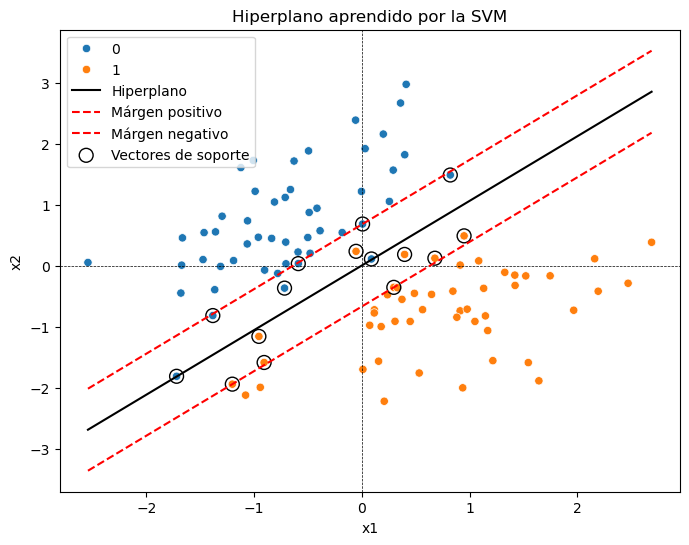

In [14]:
plot_svm(data_2,best_svc)

### 1.3. Problema no separable linealmente (I)

In [15]:
data_3=pandas.read_csv('dataset_3.csv')

In [16]:
print(data_3.shape)
data_3.head()


(100, 3)


,x1,x2,y
0,1.337404,-0.609212,1
1,-0.501418,1.189445,0
2,-1.681485,0.265543,0
3,-1.003762,1.355201,0
4,-0.056756,1.378989,0


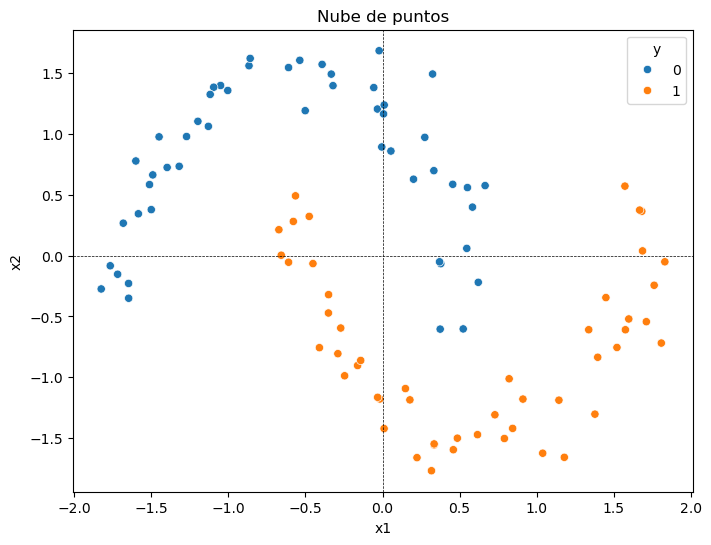

In [17]:
plot_manual(data_3)

Precisión en el conjunto de entrenamiento: 87.00%
87.0
Score: None


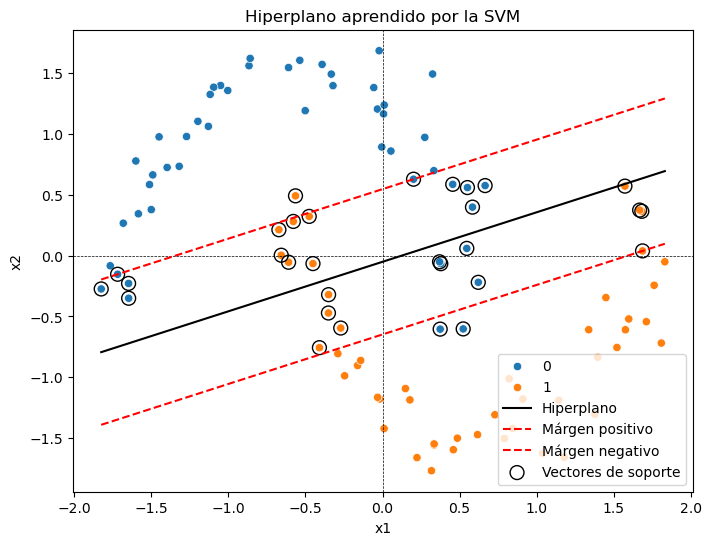

In [18]:
X = data_3[["x1", "x2"]]
y = data_3["y"]

svm = SVC(kernel="linear", C=100.0)
svm.fit(X, y)

y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento: {accuracy * 100:.2f}%")
plot_svm(data_3,svm)

Precisión en el conjunto de entrenamiento: 100.00%


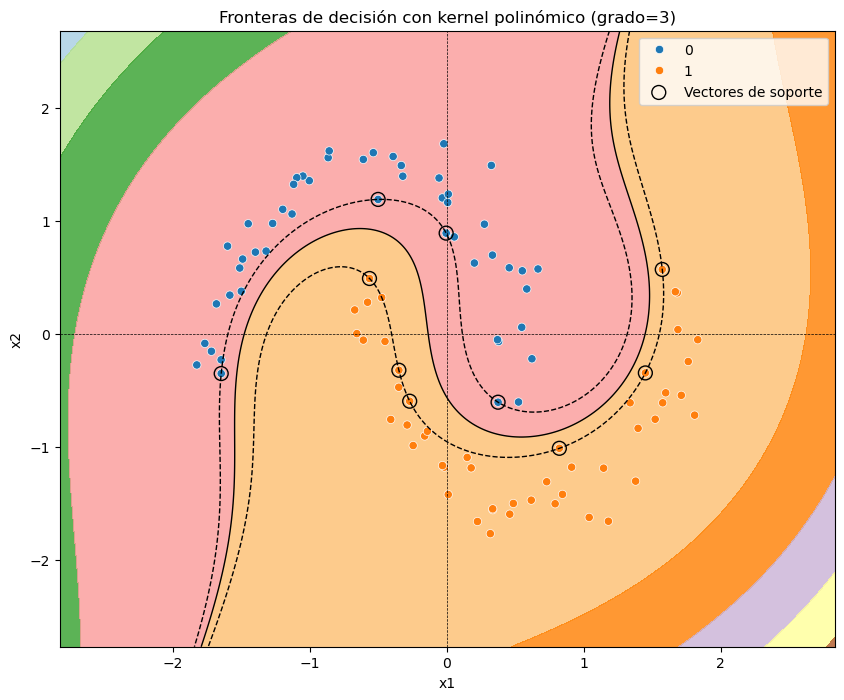

In [19]:
svm_poly = SVC(kernel="poly", degree=3, coef0=1, C=100.0)
svm_poly.fit(X, y)

y_pred = svm_poly.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento: {accuracy * 100:.2f}%")


def plot_svm_poly(data, svm,p=None):
    x_min, x_max = data["x1"].min() - 1, data["x1"].max() + 1
    y_min, y_max = data["x2"].min() - 1, data["x2"].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    if p!=None:

        # Crear DataFrame para predicción
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_df = pandas.DataFrame(grid_points, columns=["x1", "x2"])
        
        # Predecir valores en cada punto de la cuadrícula
        decision_values = svm.decision_function(grid_df)
        Z = decision_values.reshape(xx.shape)
    else:
        Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
    # Graficar las regiones de decisión
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black', linewidths=1)
    
    # Graficar puntos y vectores de soporte
    sns.scatterplot(data=data, x='x1', y='x2', hue='y')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    
    plt.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=100,
        facecolors='none',
        edgecolors='k',
        label='Vectores de soporte'
    )
    
    plt.title("Fronteras de decisión con kernel polinómico (grado=3)")
    plt.legend()
    plt.show()

plot_svm_poly(data_3,svm_poly,1)

### 1.4. Problema no separable linealmente (II)

In [20]:
data_4=pandas.read_csv('dataset_4.csv')

In [21]:
print(data_4.shape)
data_4.head()

(600, 3)


,x1,x2,y
0,-1.175234,1.055850,0
1,0.742562,-0.112292,1
2,-0.433025,-0.086161,0
3,-0.683514,0.159597,0
4,0.497397,0.032648,0


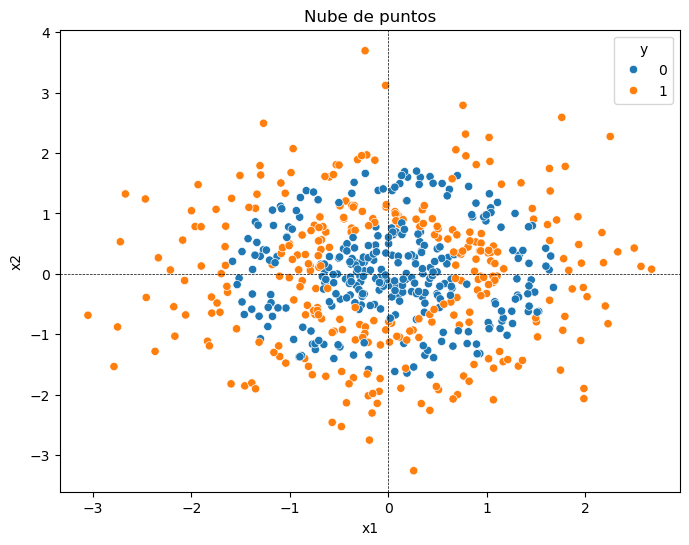

In [22]:
plot_manual(data_4)

Precisión en el conjunto de entrenamiento: 50.83%
57.666666666666664
Score: None


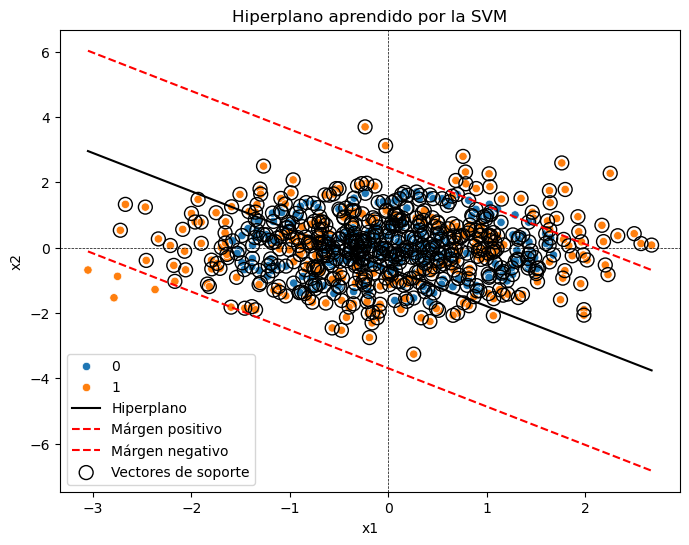

In [23]:
X = data_4[["x1", "x2"]]
y = data_4["y"]

svm = SVC(kernel="linear", C=100)
svm.fit(X, y)

y_pred = svm_poly.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento: {accuracy * 100:.2f}%")

plot_svm(data_4,svm)

Precisión en el conjunto de entrenamiento: 61.00%


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


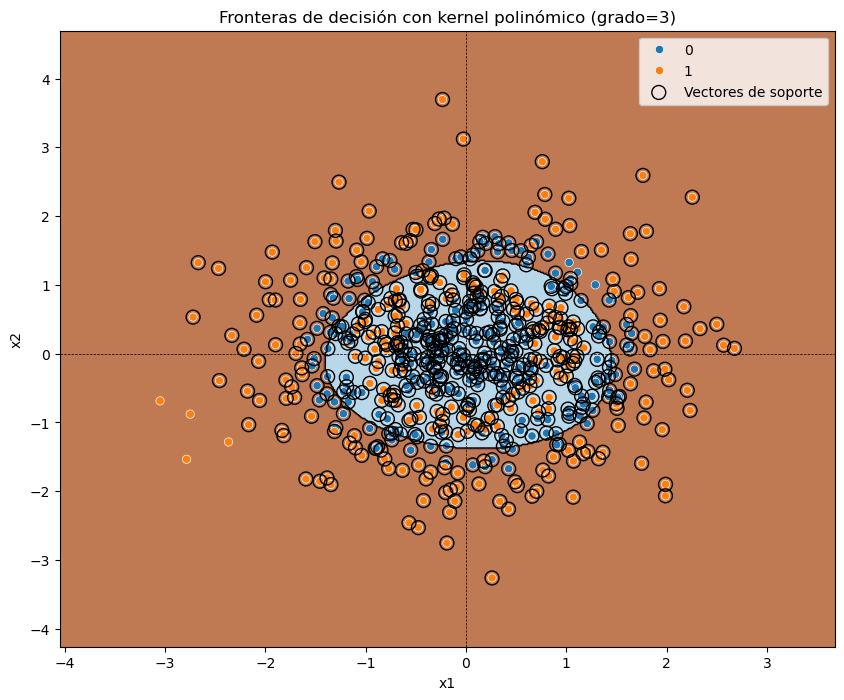

In [24]:
X = data_4[["x1", "x2"]]
y = data_4["y"]

svm_poly = SVC(kernel="poly", degree=3, coef0=5, C=100.0)
svm_poly.fit(X, y)

y_pred = svm_poly.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento: {accuracy * 100:.2f}%")

plot_svm_poly(data_4,svm)

Precisión en el conjunto de entrenamiento: 91.33%


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


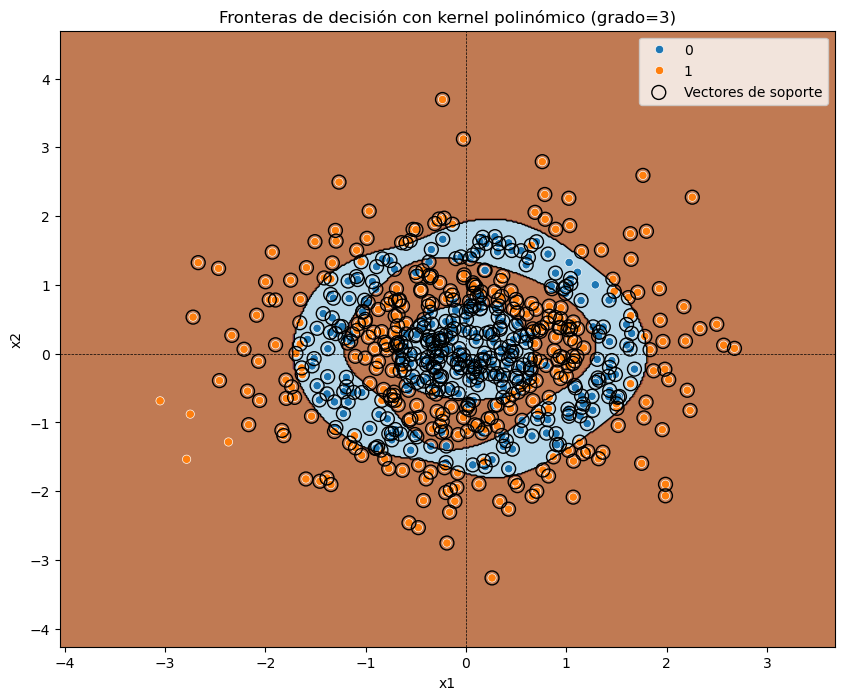

In [25]:
X = data_4[["x1", "x2"]]
y = data_4["y"]

svm_poly = SVC(kernel="rbf", C=100.0)
svm_poly.fit(X, y)

y_pred = svm_poly.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento: {accuracy * 100:.2f}%")

plot_svm_poly(data_4,svm)

## Segunda parte (caso práctico)

In [26]:
breast=pandas.read_csv('breast-cancer-train.csv')

In [27]:
print(breast.shape)
breast.head()

(423, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [28]:
breast=pandas.read_csv('breast-cancer-train.csv')
breast=breast.iloc[:,1:]
breast['diagnosis'] = breast['diagnosis'].map({'M': 1, 'B': 0})

Simpimp = SimpleImputer(missing_values = np.nan,strategy = 'median')
breast_s = Simpimp.fit_transform(breast)
breast_s= pandas.DataFrame(breast_s, columns=breast.columns)

X= breast_s.iloc[:,1:]
y= breast_s.iloc[:,0:1]  

svm_poly = SVC(kernel="rbf", C=100.0)
svm_poly.fit(X, y)

y_pred = svm_poly.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento: {accuracy * 100:.2f}%")

Precisión en el conjunto de entrenamiento: 95.04%


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
y = np.ravel(y)

p={'C':[i*0.1 for i in range(1,1000)]}
svc = SVC(kernel='rbf')

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=p,
    scoring=make_scorer(accuracy_score),
    cv=5, 
    verbose = True
)

grid_search.fit(X, y)
best_C = grid_search.best_params_['C']

print(f"Mejor valor de C: {best_C}")
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_ * 100:.2f}%")

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 4.800000000000001
Mejor puntuación de validación cruzada: 95.05%


In [30]:
blood_trans = fetch_ucirepo(id=176)

X=blood_trans.data.features
y=np.ravel(blood_trans.data.targets)


In [31]:
svm_poly = SVC(kernel="sigmoid", coef0=4, C=100.0)
svm_poly.fit(X, y)

y_pred = svm_poly.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión en el conjunto de entrenamiento: {accuracy * 100:.2f}%")

Precisión en el conjunto de entrenamiento: 76.20%


In [32]:
p={'C':[i*0.1 for i in range(1,1000)]}
svc = SVC(kernel='sigmoid')

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=p,
    scoring=make_scorer(accuracy_score),
    cv=5, 
    verbose = True
)

grid_search.fit(X, y)
best_C = grid_search.best_params_['C']

print(f"Mejor valor de C: {best_C}")
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_ * 100:.2f}%")

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 0.1
Mejor puntuación de validación cruzada: 76.20%
